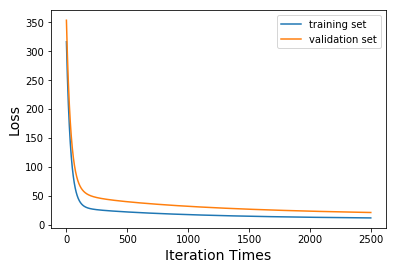

In [3]:
# %load linearegression.py
#线性回归和梯度下降的实验
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split #引入必要的库 

def get_data():  #获取数据，以及对数据进行一些预处理 
    data=load_svmlight_file('housing_scale.txt')
    x=data[0]
    y=data[1] #获取原始数据
    x=x.toarray()
    m,n=np.shape(x)
    adder=np.ones(m)
    x=np.column_stack((x,adder)) #给x增加一列，便于后面的线性回归中的常数项的处理
    np.random.seed(0)
    w=np.random.normal(0,0.5,n+1) #正态分布的w权重初始化
    x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.4,random_state=4) #分割数据集
    return x_train,y_train,x_validation,y_validation,w 

def get_loss(x,y,w): #获取loss函数值，这里是线性回归问题，我们使用均方误差（最小二乘法）作为Loss函数
    m,n=np.shape(x)
    hypothesis=np.dot(x,w)
    loss=np.dot((y-hypothesis).T,y-hypothesis)*0.5
    return loss/m

def gradientdesent(w,rate,x,y): #批量梯度下降法
    hypothesis=np.dot(x,w) #所有样本
    k,j=np.shape(x)
    x2=x.transpose()
    gradient=np.dot(x2,hypothesis-y)/k #梯度的平均值
    w=w-rate*gradient #更新权重
    return w

rate=0.003 #学习率
iterations=2500 #迭代次数
loss_trains=[] #保存Ltrain
loss_validations=[]#保存Lvalidation
iteration_times=[i for i in range(0,iterations)] #作为x轴的值
x_train,y_train,x_validation,y_validation,w=get_data() #获得数据
for i in range(0,iterations): #在迭代中
    w=gradientdesent(w,rate,x_train,y_train) #更新权重
    loss_train=get_loss(x_train,y_train,w) #获得loss
    loss_validation=get_loss(x_validation,y_validation,w)
    loss_trains.append(loss_train) #把loss加入列表
    loss_validations.append(loss_validation)

plt.xlabel("Iteration Times",size=14) #画图
plt.ylabel("Loss",size=14)
plt.plot(iteration_times,loss_trains,label="training set")
plt.plot(iteration_times,loss_validations,label="validation set")
plt.legend()
plt.show()